two_level_system.ipynb

Perform stochastic unraveling using QuTip of a two level system interacting with a single bath at high temperature. The Hamiltonian of this system and bath with the interaction is
\begin{equation}
H = H_s + H_B + V = \frac{\Delta}{2}\sigma_z;\:\:\:\:H_s = \frac{\Delta}{2}\sigma_z;\:\:\:\: V = S\otimes B
\end{equation}
with $B = \sum_k g_k (b_k + b_k^\dag)$ and $S = \frac{1}{\sqrt{2}}(\sigma_z + \sigma_x)$, so the interaction effectively acts on the system as a Hadamard gate.

The two levels are taken to be nearly degenerate such that $\Delta\ll ak_BT$, assuming an Ohmic spectral density $J(\omega)=a\omega$ (i.e. such that $a$ stands in the necessary relation to the $g_k$'s). In this case the full Redfield equation is of Lindblad form, provided that we can ignore the very small splitting $\Delta$ in the calculation of decay/dephasing rates. As such, there is one Lindblad or "collapse" operator, $L=S$, which is Hermitian in its own right.

Matthew Gerry, August 2023

In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from _utils import *

In [48]:
# Define system parameters
N = 2 # Number of levels
Delta = 0.01 # Splitting
a = 0.1 # Dimensionless coupling constant
beta = 1/4

gamma = a/beta # Unlike for the V model, here we just have one rate based on the limit that the Bohr frequency vanishes

# Define system operators
g0 = fock(2, 0)
g1 = fock(2, 1)


H = 0.5*Delta*sigmaz() # System Hamiltonian
L = (sigmax() + sigmaz())/np.sqrt(2) # Single collapse operator

rho_ss = steadystate(H,[L])



In [49]:
# Unravel the master equation

t0, tf = 0, 300
dt = 0.01
tlist = np.arange(t0, tf, dt)

psi_init = g0 # Initial state
rho_init = psi_init*psi_init.dag()
e_ops = [g0*g0.dag(), g1*g1.dag(), g1*g0.dag()] # Observables
sc_ops = [L] # Stochastic collapse operators

result = photocurrent_mesolve(H, rho_init, tlist, sc_ops=sc_ops, e_ops=e_ops, ntraj=1, noise=1, store_measurement=True)

Total run time:   0.25s


In [50]:
# Get all the expectation values
g0_evo = result.expect[0]
g1_evo = result.expect[1]
g10_evo = result.expect[2]

In [51]:
# Analytic solution using the LEPE method

g10_analytic = 0.25*(np.exp(-Delta**2*tlist/(8*gamma)) - np.multiply(np.exp(-4*Delta*tlist),np.cosh(Delta*tlist/np.sqrt(2))))

(-0.01, 1.01)

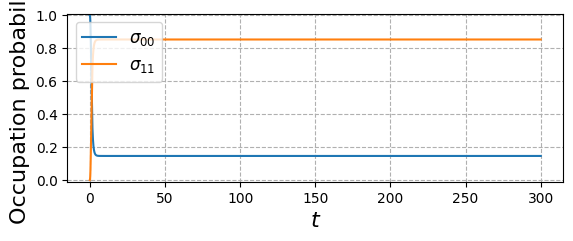

In [52]:
# Plot the populations

plt.subplot(211)
plt.plot(tlist, g0_evo, label=r'$\sigma_{00}$')
plt.plot(tlist, g1_evo, label=r'$\sigma_{11}$') 

plt.xlabel(r'$t$', fontsize=16)
plt.ylabel('Occupation probability', fontsize=16)
plt.legend(fontsize=12, loc="upper left")
plt.grid(linestyle='--')
plt.ylim(-0.01, 1.01)


/home/mgerry/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-0.05, 0.51)

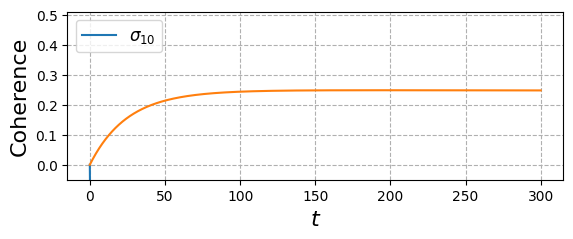

In [53]:
# Plot the coherences

plt.subplot(211)
plt.plot(tlist, g10_evo, label=r'$\sigma_{10}$')
plt.plot(tlist, g10_analytic)

plt.xlabel(r'$t$', fontsize=16)
plt.ylabel('Coherence', fontsize=16)
plt.legend(fontsize=12, loc="upper left")
plt.grid(linestyle='--')
plt.ylim(-0.05, 0.51)